# Deep Learning

In [26]:
import tensorflow
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from tensorflow import keras
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## Explorando os Dados

In [3]:
imagens_treino.shape

(60000, 28, 28)

In [4]:
imagens_teste.shape

(10000, 28, 28)

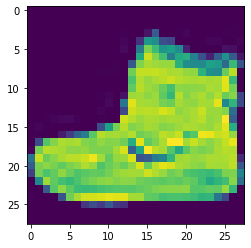

In [5]:
plt.imshow(imagens_treino[0])

Text(0.5, 1.0, '9')

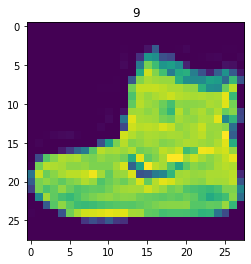

In [6]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

In [7]:
identificacoes_treino

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
identificacoes_treino.min()

0

In [9]:
identificacoes_treino.max()

9

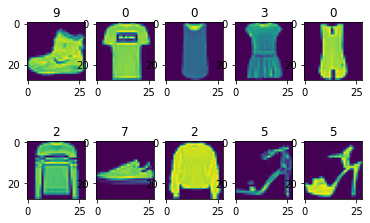

In [10]:
total_de_classificacoes = 10

for imagem in range(10):
  plt.subplot(2,5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(identificacoes_treino[imagem])

Cada exemplo de treinamento e teste é atribuído a um dos seguintes rótulos:

| Label	| Description|
| -------------  | --- |
|0|	T-shirt/top|
|1|	Trouser|
|2|	Pullover|
|3|	Dress|
|4|	Coat|
|5|	Sandal|
|6|	Shirt|
|7|	Sneaker|
|8|	Bag|
|9|	Ankle boot|



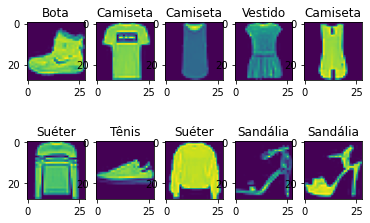

In [11]:
nome_classificacoes = ['Camiseta', 'Calça', 'Suéter',
                       'Vestido', 'Casaco', 'Sandália',
                       'Camisa', 'Tênis', 'Bolsa', 'Bota']

for imagem in range(10):
  plt.subplot(2,5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nome_classificacoes[identificacoes_treino[imagem]])

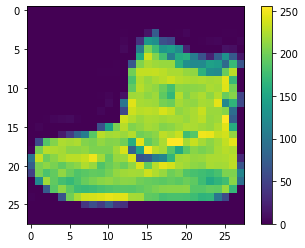

In [12]:
plt.imshow(imagens_treino[0])
plt.colorbar()

## Criando o Primeiro Modelo

In [22]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape= (28,28)), # dimensoes das imagens de acordo com o dataset
    keras.layers.Dense(256, activation= 'relu'), # 256 -> numero aleatorio multiplo de 2
    keras.layers.Dense(10, activation= 'softmax') # 10 -> ao numero de camadas
])

modelo.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    )

modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 6s 3ms/step - loss: 3.5813


In [13]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape= (28,28)), # dimensoes das imagens de acordo com o dataset
    keras.layers.Dense(256, activation= 'relu'), # 256 -> numero aleatorio multiplo de 2
    keras.layers.Dense(10, activation= 'softmax') # 10 -> ao numero de camadas
])

modelo.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    )

modelo.fit(imagens_treino, identificacoes_treino,
           # devido a versao do tensorflow ele verificaria somente 1875
           # para aumentar a quantidade de treino usa-se o parametro abaixo:
           steps_per_epoch= 60000
           )

60000/60000 [==============================] - 157s 3ms/step - loss: 2.7277


In [14]:
# realizando normalizacao
'''
imagens_treino = imagens_treino/float(255)
'''

'\nimagens_treino = imagens_treino/float(255)\n'

In [21]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape= (28,28)), # dimensoes das imagens de acordo com o dataset
    keras.layers.Dense(256, activation= 'relu'), # 256 -> numero aleatorio multiplo de 2
    keras.layers.Dense(10, activation= 'softmax') # 10 -> ao numero de camadas
])

modelo.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    )

modelo.fit(imagens_treino, identificacoes_treino,
           # devido a versao do tensorflow ele verificaria somente 1875
           # para aumentar a quantidade de treino usa-se o parametro abaixo:
           steps_per_epoch= 60000
           )


60000/60000 [==============================] - 136s 2ms/step - loss: 2.5509



Obs:
 > com a normalização, o processo ficou mais rápido, porém obtivemos um maior número de perdas



In [16]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape= (28,28)), 
    keras.layers.Dense(256, activation= 'relu'), 
    # adionamos mais uma camada de densidade para testar a influência no tempo e nas perdas
    keras.layers.Dense(128, activation= 'relu'),
    
    keras.layers.Dense(10, activation= 'softmax')
])

modelo.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    )

modelo.fit(imagens_treino, identificacoes_treino,
           # devido a versao do tensorflow ele verificaria somente 1875
           # para aumentar a quantidade de treino usa-se o parametro abaixo:
           steps_per_epoch= 60000
           )

60000/60000 [==============================] - 158s 3ms/step - loss: 1.8334



Obs:
 > com a camada de densidade extra, o processo ficou mais lento e aumentou a quantidade de dados perdidos comparados com o primeiro exemplo, mas ainda tivemos menos perdas que o anterior



In [17]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape= (28,28)), 
    # modificando o numero da Densidade de 256 -> 128
    keras.layers.Dense(128, activation= 'relu'),   
    keras.layers.Dense(10, activation= 'softmax')
])

modelo.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    )

modelo.fit(imagens_treino, identificacoes_treino,
           # devido a versao do tensorflow ele verificaria somente 1875
           # para aumentar a quantidade de treino usa-se o parametro abaixo:
           steps_per_epoch= 60000
           )

60000/60000 [==============================] - 117s 2ms/step - loss: 2.4591


In [18]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape= (28,28)), 
    # modificando o numero da Densidade de 256 -> 64
    keras.layers.Dense(64, activation= 'relu'),   
    keras.layers.Dense(10, activation= 'softmax')
])

modelo.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    )

modelo.fit(imagens_treino, identificacoes_treino,
           # devido a versao do tensorflow ele verificaria somente 1875
           # para aumentar a quantidade de treino usa-se o parametro abaixo:
           steps_per_epoch= 60000
           )

60000/60000 [==============================] - 108s 2ms/step - loss: 2.1672


In [19]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape= (28,28)), 
    keras.layers.Dense(256, activation= 'relu'), 
    keras.layers.Dense(10, activation= 'softmax') 
])

modelo.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    )

modelo.fit(imagens_treino, identificacoes_treino,
           # devido a versao do tensorflow ele verificaria somente 1875
           # para aumentar a quantidade de treino usa-se o parametro abaixo:
           steps_per_epoch= 60000,
           epochs = 5 # realizar o treino 5 vezes
           )

Epoch 1/5
60000/60000 [==============================] - 145s 2ms/step - loss: 2.4260
Epoch 2/5
60000/60000 [==============================] - 154s 3ms/step - loss: 1.7078
Epoch 3/5
60000/60000 [==============================] - 151s 3ms/step - loss: 1.6803
Epoch 4/5
60000/60000 [==============================] - 148s 2ms/step - loss: 1.7768
Epoch 5/5
60000/60000 [==============================] - 138s 2ms/step - loss: 1.8124


In [37]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape= (28,28)), 
    keras.layers.Dense(256, activation= 'relu'), 
    keras.layers.Dense(10, activation= 'softmax') 
])

modelo.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

modelo.fit(imagens_treino, identificacoes_treino,
           # devido a versao do tensorflow ele verificaria somente 1875
           # para aumentar a quantidade de treino usa-se o parametro abaixo:
           steps_per_epoch= 60000,
           epochs = 5 # realizar o treino 5 vezes
           )

Epoch 1/5
60000/60000 [==============================] - 156s 3ms/step - loss: 2.3617 - accuracy: 0.4369
Epoch 2/5
60000/60000 [==============================] - 149s 2ms/step - loss: 1.6629 - accuracy: 0.4165
Epoch 3/5
60000/60000 [==============================] - 150s 2ms/step - loss: 1.6309 - accuracy: 0.4092
Epoch 4/5
60000/60000 [==============================] - 152s 3ms/step - loss: 1.6607 - accuracy: 0.4058
Epoch 5/5
60000/60000 [==============================] - 157s 3ms/step - loss: 1.6328 - accuracy: 0.4169


In [75]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape= (28,28)), 
    keras.layers.Dense(256, activation= 'relu'), 
    keras.layers.Dense(10, activation= 'softmax') 
])

modelo.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

# gravando resultado
historico = modelo.fit(imagens_treino, identificacoes_treino,
           epochs = 10, # realizar o treino 5 vezes
           validation_split = 0.2 # dados das perda e da acurracia validados
           )

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 4.2359 - accuracy: 0.7417 - val_loss: 0.6907 - val_accuracy: 0.7752
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5958 - accuracy: 0.8026 - val_loss: 0.6130 - val_accuracy: 0.7991
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5274 - accuracy: 0.8221 - val_loss: 0.5720 - val_accuracy: 0.8160
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5017 - accuracy: 0.8307 - val_loss: 0.5207 - val_accuracy: 0.8343
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4978 - accuracy: 0.8335 - val_loss: 0.4886 - val_accuracy: 0.8389
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4717 - accuracy: 0.8420 - val_loss: 0.4921 - val_accuracy: 0.8357
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4690 - accuracy: 0.8421 - val_loss: 0.4820 - val_accuracy:

In [83]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape= (28,28)), 
    keras.layers.Dense(256, activation= 'relu'),
    keras.layers.Dropout(0.2), # 20% das unidades adormecidos
    keras.layers.Dense(10, activation= 'softmax') 
])

modelo.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

# gravando resultado
historico = modelo.fit(imagens_treino, identificacoes_treino,
           epochs = 5, # realizar o treino 5 vezes
           validation_split = 0.2 # dados das perda e da acurácia validados
           )

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 3.6180 - accuracy: 0.6526 - val_loss: 0.7243 - val_accuracy: 0.7218
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.8341 - accuracy: 0.6923 - val_loss: 0.6266 - val_accuracy: 0.7773
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.7690 - accuracy: 0.7195 - val_loss: 0.6433 - val_accuracy: 0.7916
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.7467 - accuracy: 0.7379 - val_loss: 0.6026 - val_accuracy: 0.7846
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.7340 - accuracy: 0.7453 - val_loss: 0.6391 - val_accuracy: 0.7607


In [88]:
from tensorflow.keras.models import load_model

modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

In [80]:
historico.history

{'loss': [4.282447338104248,
  0.5859233140945435,
  0.5273362398147583,
  0.5066397786140442,
  0.4951111376285553],
 'accuracy': [0.7173125147819519,
  0.8004375100135803,
  0.8210625052452087,
  0.8274999856948853,
  0.832979142665863],
 'val_loss': [0.7282313704490662,
  0.5249987244606018,
  0.5365433692932129,
  0.5226967930793762,
  0.5152546167373657],
 'val_accuracy': [0.7669166922569275,
  0.8240833282470703,
  0.8293333053588867,
  0.8301666378974915,
  0.8364999890327454]}

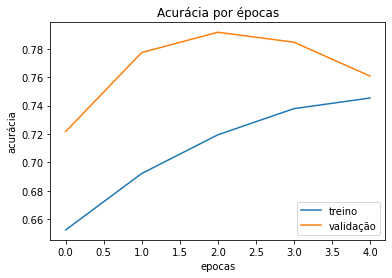

In [84]:
# plots dados do hitorico
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])

#informações extras
plt.title('Acurácia por épocas')
plt.xlabel('epocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

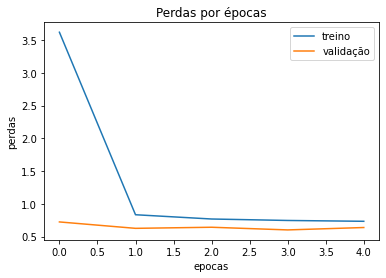

In [85]:
# plots dados do hitorico
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])

#informações extras
plt.title('Perdas por épocas')
plt.xlabel('epocas')
plt.ylabel('perdas')
plt.legend(['treino', 'validação'])

## Realizando Predict

In [89]:
testes = modelo.predict(imagens_teste)
print(f'Resultado teste {np.argmax(testes[0])}')
print(f'número da imagem de teste {identificacoes_teste[0]}')

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print(f'Resultado teste modelo salvo {np.argmax(testes_modelo_salvo[0])}')
print(f'Número da imagem de teste modelo salvo {identificacoes_teste[0]}')

313/313 [==============================] - 1s 2ms/step
Resultado teste 9
número da imagem de teste 9
313/313 [==============================] - 1s 2ms/step
Resultado teste modelo salvo 9
Número da imagem de teste modelo salvo 9


In [90]:
testes = modelo.predict(imagens_teste)
print(f'Resultado teste {np.argmax(testes[2])}')
print(f'número da imagem de teste {identificacoes_teste[2]}')

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print(f'Resultado teste modelo salvo {np.argmax(testes_modelo_salvo[2])}')
print(f'Número da imagem de teste modelo salvo {identificacoes_teste[2]}')

313/313 [==============================] - 1s 3ms/step
Resultado teste 1
número da imagem de teste 1
313/313 [==============================] - 1s 2ms/step
Resultado teste modelo salvo 1
Número da imagem de teste modelo salvo 1


In [91]:
testes = modelo.predict(imagens_teste)
print(f'Resultado teste {np.argmax(testes[4])}')
print(f'número da imagem de teste {identificacoes_teste[4]}')

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print(f'Resultado teste modelo salvo {np.argmax(testes_modelo_salvo[4])}')
print(f'Número da imagem de teste modelo salvo {identificacoes_teste[4]}')

313/313 [==============================] - 1s 3ms/step
Resultado teste 6
número da imagem de teste 6
313/313 [==============================] - 1s 2ms/step
Resultado teste modelo salvo 6
Número da imagem de teste modelo salvo 6


In [71]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print(f'Perda do teste {perda_teste}')
print(f'Ácuracia do teste {acuracia_teste}')

313/313 [==============================] - 1s 3ms/step - loss: 0.5548 - accuracy: 0.8061
Perda do teste 0.5548422932624817
Ácuracia do teste 0.8061000108718872


## Underfitting e Overfitting